In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Carregando o dataset
hcc = pd.read_csv("hcc_dataset.csv", sep=",")

'''
#Ajetiando os valores nulos
hcc.replace(np.nan, 'None', inplace=True) #Na tabela tem células com o valor None que ele interpreta como um np.nan, então precisamos garantir que ele vai entender isso como um valor válido
hcc.replace('?', np.nan, inplace=True) #As células vazias possuem uma '?', então aqui dizemos que essas células sõa NaN
'''
#Vendo os valores vazios de cada coluna
for column in hcc.columns:
    print(column, ' - ', hcc[column].isnull().sum())

Gender  -  0
Symptoms  -  0
Alcohol  -  0
HBsAg  -  0
HBeAg  -  0
HBcAb  -  0
HCVAb  -  0
Cirrhosis  -  0
Endemic  -  0
Smoking  -  0
Diabetes  -  0
Obesity  -  0
Hemochro  -  0
AHT  -  0
CRI  -  0
HIV  -  0
NASH  -  0
Varices  -  0
Spleno  -  0
PHT  -  0
PVT  -  0
Metastasis  -  0
Hallmark  -  0
Age  -  0
Grams_day  -  0
Packs_year  -  0
PS  -  0
Encephalopathy  -  142
Ascites  -  109
INR  -  0
AFP  -  0
Hemoglobin  -  0
MCV  -  0
Leucocytes  -  0
Platelets  -  0
 Albumin  -  0
Total_Bil  -  0
ALT  -  0
AST  -  0
GGT  -  0
ALP  -  0
TP  -  0
Creatinine  -  0
Nodules  -  0
Major_Dim  -  0
Dir_Bil  -  0
Iron  -  0
Sat  -  0
Ferritin  -  0
Class  -  0


In [ ]:
#Analisando os valores NaN
hcc['Encephalopathy']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
160    NaN
161    NaN
162    NaN
163    NaN
164    NaN
Name: Encephalopathy, Length: 165, dtype: object

In [ ]:
hcc['Ascites']
#Se formos comparar esses valores no dataset veremos que eles não estão vazios, mas sim com o valor None,que é imterpretado como NaN
#Logo precisamos tratar isso

0       NaN
1       NaN
2      Mild
3       NaN
4       NaN
       ... 
160     NaN
161     NaN
162     NaN
163     NaN
164     NaN
Name: Ascites, Length: 165, dtype: object

In [ ]:
#Precisamos ver se não há valores que deveriam ser vazios
for column in hcc.columns:
    print(hcc[column].value_counts())
#Com isso conseguimos ver que há muitos valores com uma '?' o que possivelmente significa não foi passado nenhuma informação para esses valores

Gender
Male      133
Female     32
Name: count, dtype: int64
Symptoms
Yes    94
No     53
?      18
Name: count, dtype: int64
Alcohol
Yes    122
No      43
Name: count, dtype: int64
HBsAg
No     132
?       17
Yes     16
Name: count, dtype: int64
HBeAg
No     125
?       39
Yes      1
Name: count, dtype: int64
HBcAb
No     103
Yes     38
?       24
Name: count, dtype: int64
HCVAb
No     122
Yes     34
?        9
Name: count, dtype: int64
Cirrhosis
Yes    149
No      16
Name: count, dtype: int64
Endemic
No     116
?       39
Yes     10
Name: count, dtype: int64
Smoking
Yes    63
No     61
?      41
Name: count, dtype: int64
Diabetes
No     106
Yes     56
?        3
Name: count, dtype: int64
Obesity
No     135
Yes     20
?       10
Name: count, dtype: int64
Hemochro
No     135
?       23
Yes      7
Name: count, dtype: int64
AHT
No     103
Yes     59
?        3
Name: count, dtype: int64
CRI
No     143
Yes     20
?        2
Name: count, dtype: int64
HIV
No     148
?       14
Yes      3
Nam

In [ ]:
hcc.info()
#Além disso podemos perceber que existem colunas que deveriam ser de algum tipo numérico mas são objetos, então também precisamos tratar isso

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          165 non-null    object
 1   Symptoms        165 non-null    object
 2   Alcohol         165 non-null    object
 3   HBsAg           165 non-null    object
 4   HBeAg           165 non-null    object
 5   HBcAb           165 non-null    object
 6   HCVAb           165 non-null    object
 7   Cirrhosis       165 non-null    object
 8   Endemic         165 non-null    object
 9   Smoking         165 non-null    object
 10  Diabetes        165 non-null    object
 11  Obesity         165 non-null    object
 12  Hemochro        165 non-null    object
 13  AHT             165 non-null    object
 14  CRI             165 non-null    object
 15  HIV             165 non-null    object
 16  NASH            165 non-null    object
 17  Varices         165 non-null    object
 18  Spleno    

In [ ]:
#Para facilitar a nossa análise vamos ajeitar os pontos citados anteriormente

#Ajetiando os valores nulos
hcc.replace(np.nan, 'None', inplace=True) #Na tabela tem células com o valor None que ele interpreta como um np.nan, então precisamos garantir que ele vai entender isso como um valor válido
hcc.replace('?', np.nan, inplace=True) #As células vazias possuem uma '?', então aqui dizemos que essas células sõa NaN

hcc.info()
#Após fazer essa mudança fica claro que nós temos muitos valores nulos para tratar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          165 non-null    object
 1   Symptoms        147 non-null    object
 2   Alcohol         165 non-null    object
 3   HBsAg           148 non-null    object
 4   HBeAg           126 non-null    object
 5   HBcAb           141 non-null    object
 6   HCVAb           156 non-null    object
 7   Cirrhosis       165 non-null    object
 8   Endemic         126 non-null    object
 9   Smoking         124 non-null    object
 10  Diabetes        162 non-null    object
 11  Obesity         155 non-null    object
 12  Hemochro        142 non-null    object
 13  AHT             162 non-null    object
 14  CRI             163 non-null    object
 15  HIV             151 non-null    object
 16  NASH            143 non-null    object
 17  Varices         113 non-null    object
 18  Spleno    

In [ ]:
#Convertendo as colunas numéricas
for column in hcc.columns:
    #Convertendo os valores que são numéricos para float
    if hcc[column].dtype == 'object':
        try:
            if hcc[column].apply(lambda x: pd.to_numeric(x, errors='coerce')).notnull().any() and column != 'Nodules': # Pois Nodules é uma categoria apesar de ser definido por números
                hcc[column] = pd.to_numeric(hcc[column], errors='coerce')
        except ValueError:
            try:
                hcc[column] = pd.to_datetime(hcc[column], errors='coerce')
            except ValueError:
                pass
hcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          165 non-null    object 
 1   Symptoms        147 non-null    object 
 2   Alcohol         165 non-null    object 
 3   HBsAg           148 non-null    object 
 4   HBeAg           126 non-null    object 
 5   HBcAb           141 non-null    object 
 6   HCVAb           156 non-null    object 
 7   Cirrhosis       165 non-null    object 
 8   Endemic         126 non-null    object 
 9   Smoking         124 non-null    object 
 10  Diabetes        162 non-null    object 
 11  Obesity         155 non-null    object 
 12  Hemochro        142 non-null    object 
 13  AHT             162 non-null    object 
 14  CRI             163 non-null    object 
 15  HIV             151 non-null    object 
 16  NASH            143 non-null    object 
 17  Varices         113 non-null    obj

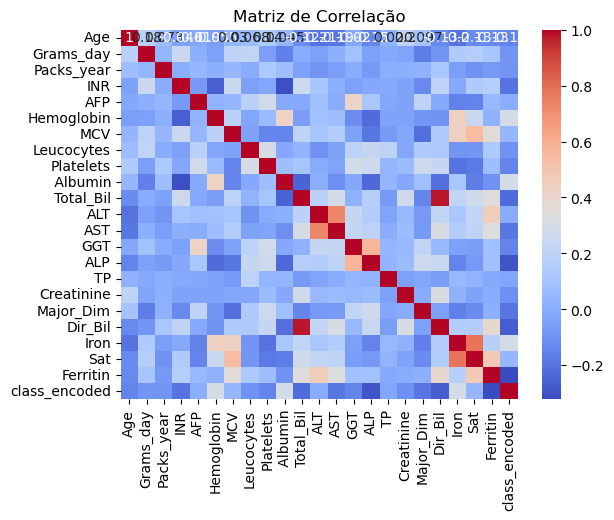

Correlação com a variável alvo (class):
Hemoglobin    0.292357
Iron          0.291406
 Albumin      0.287799
Sat           0.043110
MCV           0.042074
AFP           0.001972
ALT          -0.006058
TP           -0.029274
Grams_day    -0.086573
Packs_year   -0.089814
Leucocytes   -0.102192
Creatinine   -0.108708
Age          -0.146054
GGT          -0.148655
Platelets    -0.150911
AST          -0.190614
Major_Dim    -0.193681
INR          -0.202348
Total_Bil    -0.223961
Dir_Bil      -0.264903
ALP          -0.293873
Ferritin     -0.321489
Name: class_encoded, dtype: float64


In [ ]:
# Separando as variáveis numéricas
numerical_cols = hcc.select_dtypes(include=['float64', 'int64'])
numerical_cols['class_encoded'] = hcc['Class'].astype('category').cat.codes

# Calculando a matriz de correlação para variáveis numéricas, incluindo a variável alvo codificada
correlation_matrix = numerical_cols.corr()

# Visualizando a matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Correlação específica das variáveis numéricas com a variável alvo
target_corr = correlation_matrix['class_encoded'].drop('class_encoded')
print("Correlação com a variável alvo (class):")
print(target_corr.sort_values(ascending=False))


In [ ]:
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

categorical_cols = hcc.select_dtypes(include=['object', 'category'])
categorical_cols = categorical_cols.drop(columns = ['Class'])

# Calculando Cramér's V para variáveis categóricas
cramers = {}
for column in categorical_cols:
    contingency_table = pd.crosstab(hcc[column], hcc['Class'])
    cramers_v_value = cramers_v(contingency_table.to_numpy())
    cramers[column] = cramers_v_value

# Imprime os valores ordenados
for value in sorted(cramers.values(), reverse = True):
    for key, v in cramers.items():
        if v == value:
            # Imprime a chave e o valor
            print(f'Cramér\'s V para {key}: {value}')
            break  # Para quando a chave é encontrada


Cramér's V para PS: 0.3964946684354381
Cramér's V para Symptoms: 0.28269057573439044
Cramér's V para Ascites: 0.2614078450493166
Cramér's V para Metastasis: 0.2339423424404964
Cramér's V para Encephalopathy: 0.2007271168466436
Cramér's V para PVT: 0.1979720937587811
Cramér's V para Nodules: 0.1458531706015916
Cramér's V para HCVAb: 0.09921260167379604
Cramér's V para Diabetes: 0.09910201707088039
Cramér's V para Endemic: 0.07917480994927602
Cramér's V para CRI: 0.06796612755185111
Cramér's V para Smoking: 0.062477921840125066
Cramér's V para AHT: 0.05490216086451219
Cramér's V para Varices: 0.03421401357552997
Cramér's V para HBcAb: 0.032582663946283265
Cramér's V para NASH: 0.02929885025014254
Cramér's V para PHT: 0.027290215482777352
Cramér's V para Alcohol: 0.02609324722600992
Cramér's V para HBeAg: 0.025065132546332507
Cramér's V para Gender: 0.022659336040203412
Cramér's V para Cirrhosis: 0.016479203942478
Cramér's V para Spleno: 0.016048289115161558
Cramér's V para Hemochro: 0.01

In [ ]:
#Agora que já temos definidas quais são os atributos categóricos e quais são os numérios vamos analisar se existem categorias repetidas por algum problema na formatação das letras
for column in hcc.columns:
        if hcc[column].dtype == 'object':
            print(hcc[column].value_counts())
#Como foi possivel ver não existem categeorias repetidas, mas por vias das dúvidas acredito que seja melhor colocar as categorias em uppercase ou lowercase

In [ ]:
#Agora vamos analisar a porcentagem dos valores nulos
# Calcular a porcentagem de valores ausentes em cada coluna
print("\n=== PORCENTAGEM TOTAL DOS VALORES AUSENTES ===")
total_missing = (hcc.isnull().mean().mean() * 100)
total_missing = "{:.2f}%".format(total_missing)
print(total_missing)

print("\n=== PORCENTAGEM DOS VALORES AUSENTES POR COLUNA ===")
percent_missing = hcc.isnull().mean() * 100
percent_missing = percent_missing.apply(lambda x: "{:.2f}%".format(x))
print(percent_missing)

In [ ]:
def plot_bar(column):
    if column != 'Age':
        # Agrupar os dados e contar as ocorrências de cada combinação de gênero e classe
        grouped = hcc.groupby([column, 'Class']).size().unstack(fill_value=0)

        # Plotar o gráfico
        ax = grouped.plot(kind='bar', stacked=False, color=colors)
    else:
        # Criar intervalos de idade de 5 em 5
        age_interval = pd.cut(hcc['Age'], bins=np.arange(0, hcc['Age'].max()+5, 5))

        # Agrupar os dados por intervalo de idade e contar as ocorrências de cada combinação de gênero e classe
        grouped = hcc.groupby([age_interval, 'Class'], observed=False).size().unstack(fill_value=0)

        # Plotar o gráfico
        fig, ax = plt.subplots(figsize=(12, 4))
        grouped.plot(kind='bar', stacked=False, color=colors, ax=ax)


    # Adicionar rótulos de barra
    for container in ax.containers:
        ax.bar_label(container, label_type='center', padding=3)

    # Adicionar rótulos e título
    plt.xlabel(column)
    plt.ylabel('Quantity')
    plt.title(f'Class by {column} Graph')

    # Exibir o gráfico
    plt.show()

In [ ]:
def plot_pie(column):
    fig, (ax1, ax2) = plt.subplots(1, 2)

    filtered_data = hcc[hcc['Class'] == 'Lives']
    values_frequency = filtered_data[column].value_counts()
    ax1.pie(values_frequency.tolist(), labels=values_frequency.index.tolist(), colors=colors,autopct='%1.1f%%', startangle=140)
    ax1.axis('equal')
    ax1.set_title(f'{column} X Lives')

    filtered_data = hcc[hcc['Class'] == 'Dies']
    values_frequency = filtered_data[column].value_counts()
    ax2.pie(values_frequency.tolist(), labels=values_frequency.index.tolist(), colors=colors,autopct='%1.1f%%', startangle=140)
    ax2.axis('equal')
    ax2.set_title(f'Class by {column} Graph')

    plt.tight_layout()
    plt.show()
    print('\n\n')

In [ ]:
def plot_scatter(column):
    lives_data = hcc[hcc['Class'] == 'Lives']
    dies_data = hcc[hcc['Class'] == 'Dies']

    # Plotando os pontos para pessoas vivas
    plt.scatter(lives_data[column], lives_data['Age'], color=colors[0], label='Lives')

    # Plotando os pontos para pessoas mortas
    plt.scatter(dies_data[column], dies_data['Age'], color=colors[1], label='Dies')

    # Adicionando rótulos aos eixos e ao gráfico
    plt.xlabel(column)
    plt.ylabel('Age')
    plt.title(f'Age by {column} Graph')
    plt.legend()

    # Exibindo o gráfico
    plt.show()

In [ ]:
colors = ['#C43302', '#0A7373', '#EDAA25', '#520120', '#B7BF99', '#706513']

#Plotando os gráficos de cada uma das colunas:
for column in hcc.columns[:-1]: # isso remove a coluna Class, pois ela é a nossa base de análise
    #Convertendo os valores que são numéricos para float
    if hcc[column].dtype == 'object' or column == 'Age':
        if not(column in ['PS', 'Encephalopathy', 'Ascites', 'Nodules']):
            plot_bar(column)
        else:
            #Se preferirem deixar só o de gráfico de barra é só apagar esse else, o plot_pie e o if anterior
            plot_pie(column)
    else:
        plot_scatter(column)
    print('\n\n')


In [ ]:
'''
Possiveis outliers:
-> Grams_Day (<5 pontos espalhados - distancia > 50% de x)
-> INR (1 ponto muito distante)
-> Packs_Yer
-> INR (<5 pontos espalhados - distancia > 50%) #TALVEZ NÃO SEJA - está mais distribuido que os outros
-> AFP (1 ponto muito distante)
-> Total_Bill (>5 pontos espalhados - distancia > 30% de x)
-> ALT (<5 pontos espalhados - distancia > 50% de x) #Talvez não seja
-> TP (Tem uns pontos se afastando demais) #Talvez não seja também
-> Dir_Bil (<5 pontos espalhados - distancia > 50% de x)

# Talvez tenha outliers no ALP


-> Leucocitos tem vários como zero
-> Platelets tem alguns como zero também

-> Precisamos analisar as possiveis causas e como tratar isso
'''